In [188]:
import pandas as pd
df=pd.read_csv("/Users/joiecheng/Downloads/fct_invoice.csv")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [189]:
cf=pd.read_json("/Users/joiecheng/Downloads/dim_customer.json")
cf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


### Easy 1: How many unique customers are in the dataset?

### 4992 customers

In [80]:
full_name=cf["first_name"].str.cat(cf["last_name"],sep=" ")
full_name.nunique()

4992

### Easy 2: What are the different categories of products available? How many unique categories are there?

### 8 categories: clothing, shoes, books, cosmetics, food & beverage, toys, technology, souvenir

In [81]:
categories=df["category"]
unique_category=categories.unique()
print(unique_category)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


### Easy 3: Which payment method is the most popular? How many times was it used?

### cash - 44447 times

In [82]:
df.groupby("payment_method").count()["invoice_no"]

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64

### Medium 1: What are the three most popular categories, by total sales?

### 1. clothing - 34,487
### 2. cosmetics - 15,097
### 3. food & beverage - 14,776

In [83]:
df.groupby("category").count()["invoice_no"]

category
Books               4981
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Toys               10087
Name: invoice_no, dtype: int64

### Medium 2: What are the total sales attributed to customers over the age of 45?

### 84307291.82

In [190]:
invoice=pd.read_csv("/Users/joiecheng/Downloads/fct_invoice.csv")
customers=pd.read_json("/Users/joiecheng/Downloads/dim_customer.json")
cf
merged_df=pd.merge(
    invoice,
    customers,
    how="inner",
    left_on="customer_id",
    right_on="id"
)

In [200]:
merged_df["sales"]=merged_df["price"]*merged_df["quantity"]
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson,7502.00
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson,162.64
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson,5401.53
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson,2700.72
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson,15004.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell,600.17
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32


In [86]:
sum_sales = merged_df.groupby('age').sum(float)['sales']
sales_45 = sum_sales.loc[45:].sum()
sales_45

84307291.82

### Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

In [252]:
sorted_merged_df = merged_df.sort_values(by='invoice_date', ascending=True)
dated_invoice = sorted_merged_df['invoice_date'].value_counts()
dated_invoice.sort_index()

1/1/2021     105
1/1/2022     101
1/1/2023     145
1/10/2021    132
1/10/2022    126
            ... 
9/7/2022     110
9/8/2021     135
9/8/2022     126
9/9/2021     136
9/9/2022     138
Name: invoice_date, Length: 797, dtype: int64

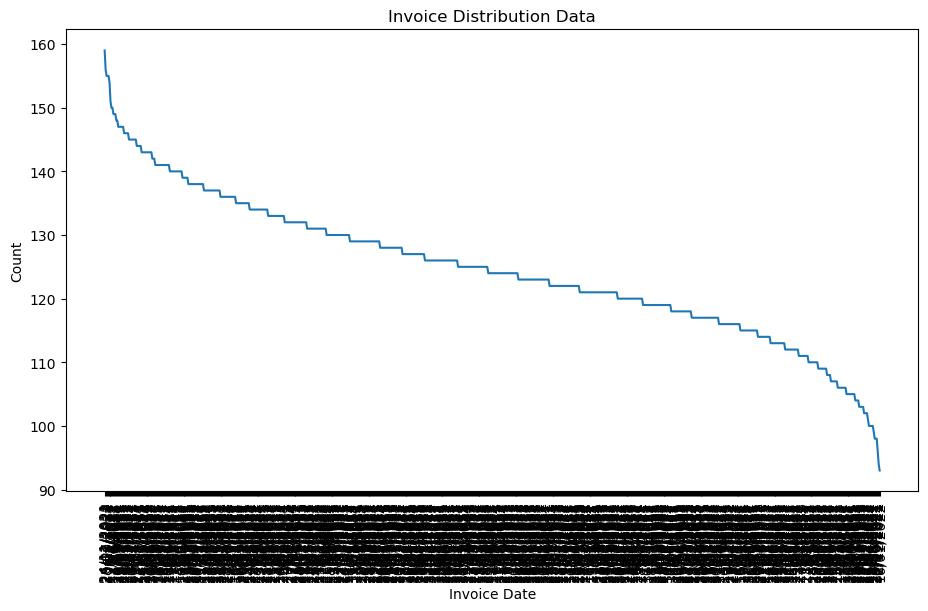

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))
plt.plot(dated_invoice.index,dated_invoice.values)
plt.xlabel("Invoice Date")
plt.ylabel("Count")
plt.title("Invoice Distribution Data")
plt.xticks(rotation=90, fontsize=10)
plt.show()

### Hard: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [251]:
age_ranges=range(10,100,10) #ages 0-100
merged_df["ages"]=pd.cut(merged_df["age"],age_ranges)
categorized=merged_df.groupby(["category","ages"])["sales"].sum().reset_index()
pivot=categorized.pivot_table(index="category",columns="ages",values="sales")
pivot

ages,"(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]"
category,,,,,,,,
Books,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95
Clothing,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04
Cosmetics,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80
Food & Beverage,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12
Shoes,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97
Souvenir,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25
Technology,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00
Toys,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00
